In [39]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import (r2_score, mean_squared_error, 
              root_mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier 


In [2]:
# Load dataset 
train = pd.read_csv("./train.csv")

In [3]:
# Explore first rows
train.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [4]:
# Dataset shape
train.shape

(800, 10)

In [5]:
# Columns
train.columns

Index(['credit_score', 'income', 'loan_amount', 'loan_term', 'interest_rate',
       'debt_to_income_ratio', 'employment_years', 'savings_balance', 'age',
       'default_risk_score'],
      dtype='object')

In [6]:
# Data types and non-null rows 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [7]:
# Null values 
train.isna().sum()

credit_score            0
income                  0
loan_amount             0
loan_term               0
interest_rate           0
debt_to_income_ratio    0
employment_years        0
savings_balance         0
age                     0
default_risk_score      0
dtype: int64

In [8]:
# Duplicate rows
train.duplicated().sum()

0

In [9]:
# Summary
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_score,800.0,565.405000,159.528109,300.00000,426.750000,553.000000,702.000000,849.000000
income,800.0,85779.287500,37972.705711,20060.00000,53056.250000,85105.000000,118776.000000,149972.000000
loan_amount,800.0,27795.651250,12819.525021,5097.00000,16136.000000,28518.500000,38539.750000,49976.000000
loan_term,800.0,36.315000,17.163012,12.00000,24.000000,36.000000,48.000000,60.000000
interest_rate,800.0,8.732238,3.670453,2.51000,5.537500,8.725000,11.915000,14.990000
debt_to_income_ratio,800.0,29.812500,11.626346,10.00000,19.925000,29.645000,40.005000,49.910000
employment_years,800.0,16.376250,10.036339,0.00000,8.000000,16.000000,25.000000,34.000000
savings_balance,800.0,48850.921250,29785.455545,28.00000,21359.750000,47314.500000,76191.000000,99976.000000
age,800.0,42.443750,15.011446,18.00000,29.000000,42.000000,55.250000,69.000000
default_risk_score,800.0,4529.968687,2567.048232,49.75794,2377.592064,4379.666025,6821.026905,9113.843128


## EDA

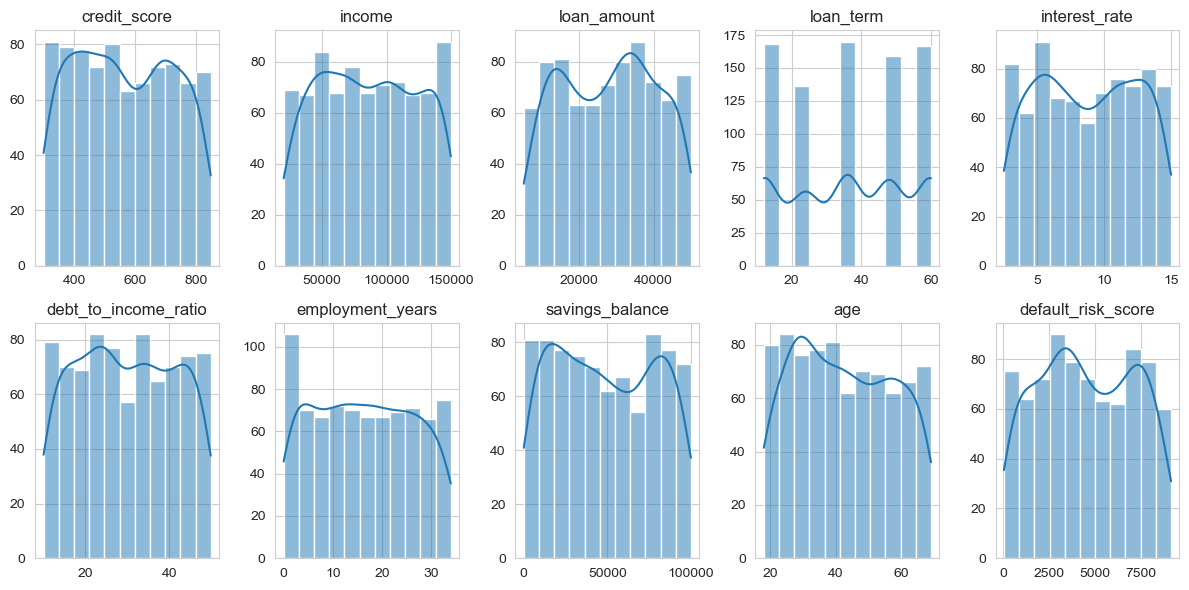

In [10]:
# Data distribution
sns.set_style('whitegrid')

cols = list(train.columns)

fig, axs = plt.subplots(2,5, figsize=(12,6))
for i, col in enumerate(cols):
    row = i //5
    col_idx = i % 5
    sns.histplot(train[col], ax= axs[row, col_idx], kde= True)
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].set_xlabel('')
    axs[row, col_idx].set_ylabel('')
plt.tight_layout()

plt.show()

<p> The histograms show that none of the variables is normally or near-normally distributed
Therefore: Use MinMax scaling if required; explore log transformation of predictors and outcome.
There doesn't seem to be any outliers in the data.
<p/>

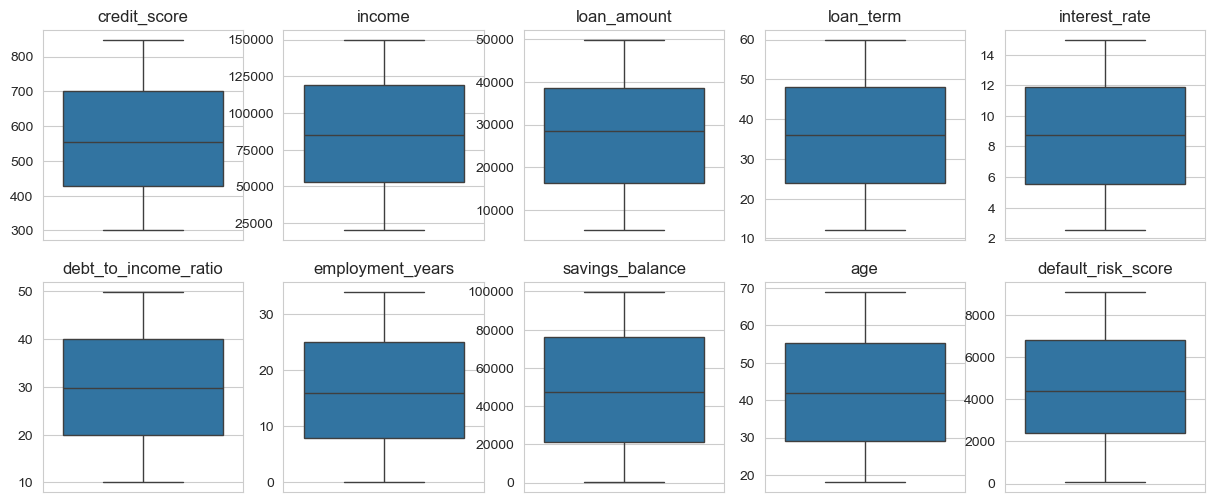

In [11]:
# Outliers
fig, axs = plt.subplots(2,5, figsize=(15,6))
for i, col in enumerate(cols):
    row = i // 5
    col_idx = i % 5
    sns.boxplot(train[col], ax= axs[row, col_idx])
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].set_ylabel('')

plt.show()

In [28]:
# Correlations
pearsons_corr = train.corr()
pearsons_corr

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
credit_score,1.000000,-0.084096,0.073087,0.000842,-0.006627,-0.011907,-0.025732,-0.003636,0.026547,-0.091758
income,-0.084096,1.000000,-0.028264,-0.000185,-0.004219,0.046865,0.005565,-0.043084,0.059981,0.029943
loan_amount,0.073087,-0.028264,1.000000,-0.039474,-0.028498,-0.001226,-0.001223,0.048229,-0.030310,-0.999811
loan_term,0.000842,-0.000185,-0.039474,1.000000,0.005970,0.039877,0.016836,0.017905,0.042186,0.039527
interest_rate,-0.006627,-0.004219,-0.028498,0.005970,1.000000,-0.048962,-0.082407,0.070818,-0.015429,0.028993
debt_to_income_ratio,-0.011907,0.046865,-0.001226,0.039877,-0.048962,1.000000,0.002237,-0.055064,0.028763,0.003314
employment_years,-0.025732,0.005565,-0.001223,0.016836,-0.082407,0.002237,1.000000,-0.012037,0.007513,0.000445
savings_balance,-0.003636,-0.043084,0.048229,0.017905,0.070818,-0.055064,-0.012037,1.000000,0.004069,-0.050380
age,0.026547,0.059981,-0.030310,0.042186,-0.015429,0.028763,0.007513,0.004069,1.000000,0.029188
default_risk_score,-0.091758,0.029943,-0.999811,0.039527,0.028993,0.003314,0.000445,-0.050380,0.029188,1.000000


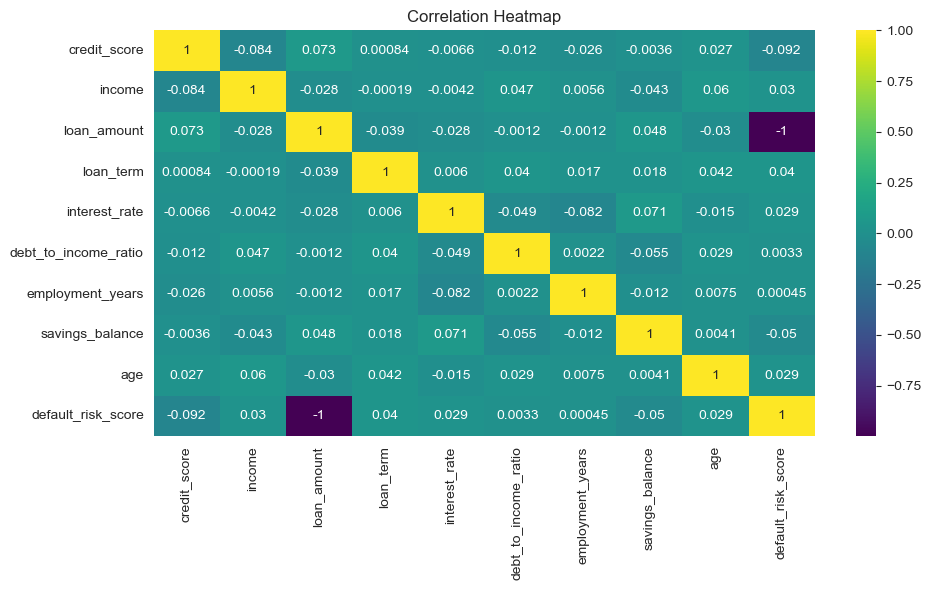

In [34]:
# Correlation heat map
plt.figure(figsize = (10,6))
sns.heatmap(pearsons_corr, annot=True, cmap = 'viridis', cbar= True)
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()

There is almost perfect positive correlation between default risk and loan amount. Plausible? The larger the amount, the higher 
the default risk. We can check paired scatter plots to find out. There is nor risk of multicollinearity as all the coefficients 
in the predictors are less than 0.8 . Other feaures have weak correlation of +/1 10%. Two features:
employment years and debt to income ratio have very low correlation - investigate whether to drop using p values


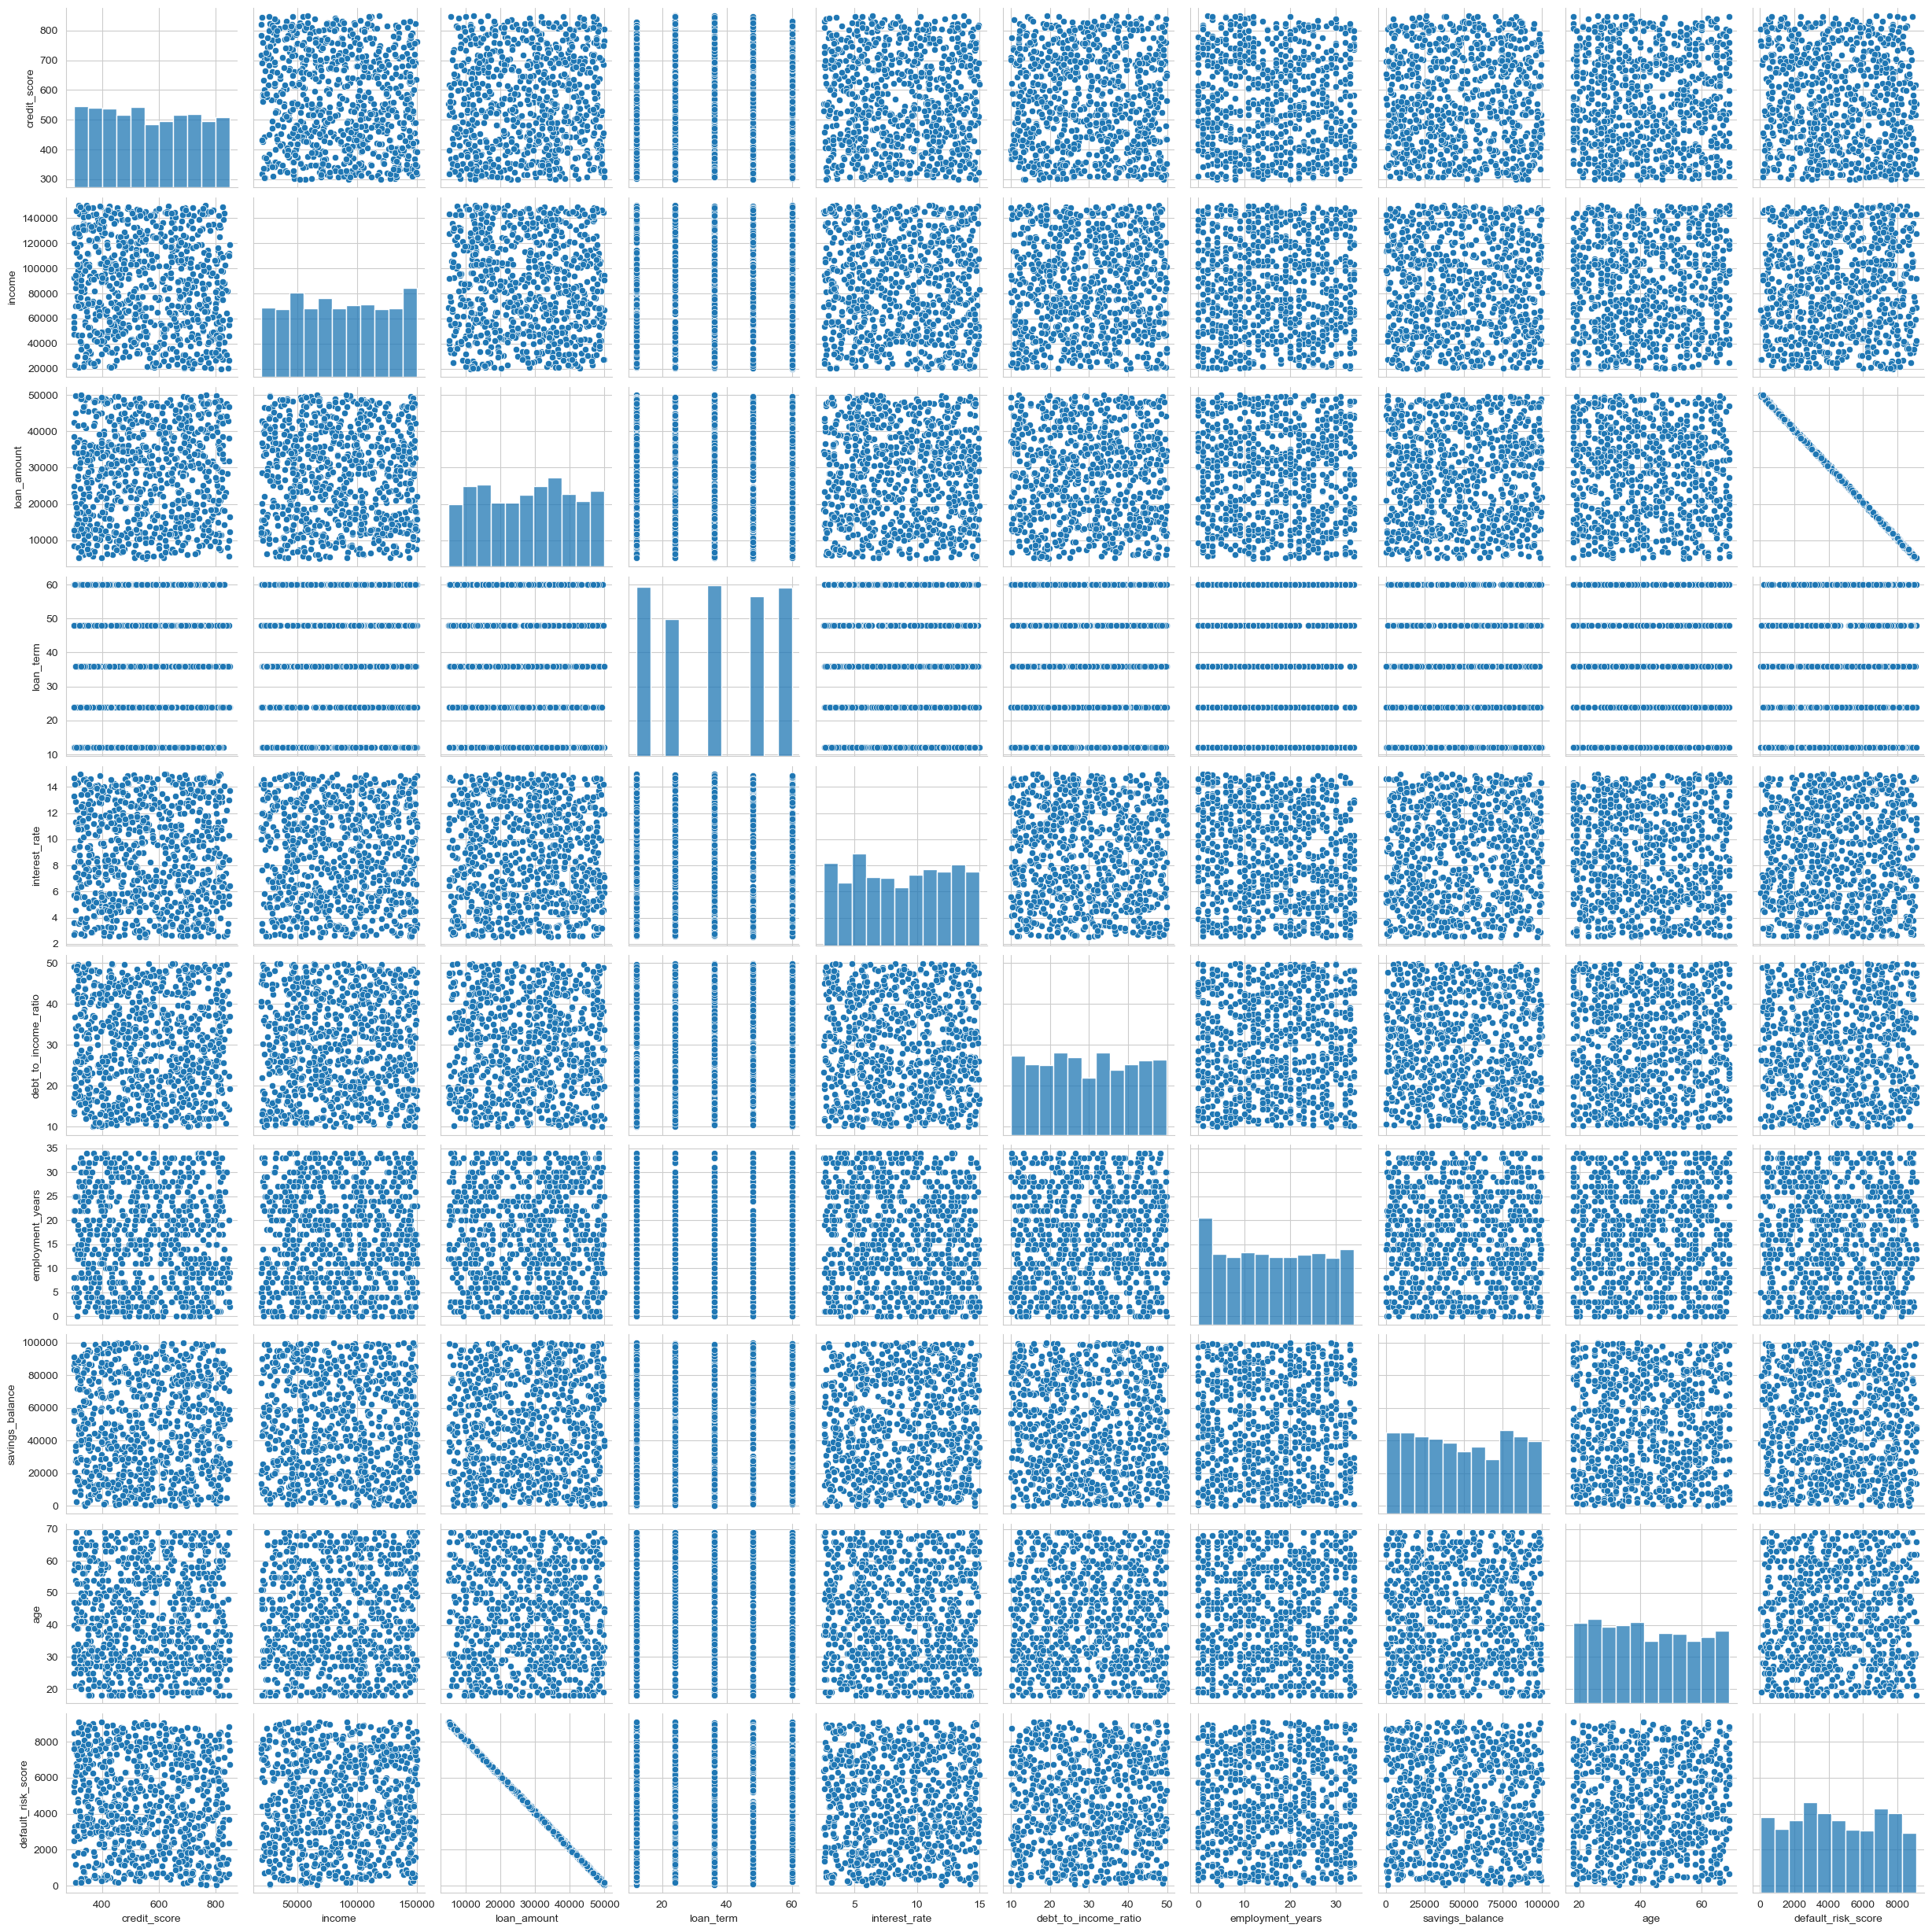

In [36]:
# Pair plots
sns.pairplot(train)

plt.show()

## Linear Regression


In [19]:
# Statsmodels without feature scaling
train_features = train.copy()
train_features['default_risk_score'] = np.log(train_features['default_risk_score'])

y = train_features['default_risk_score']
X = train_features.drop('default_risk_score', axis= 'columns')

X_cons = sm.add_constant(X)

# Fit model
results = sm.OLS(y, X_cons).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     403.9
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          1.44e-288
Time:                        20:06:18   Log-Likelihood:                -340.74
No. Observations:                 800   AIC:                             701.5
Df Residuals:                     790   BIC:                             748.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7735 

In [24]:
# Statsmodels with feature scaling

# Initialize scaler
scaler = MinMaxScaler()

# Scale X
X_scaled = scaler.fit_transform(X)

# Perform regression

results_scaled = sm.OLS(y, sm.add_constant(X_scaled)).fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     403.9
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          1.44e-288
Time:                        20:11:13   Log-Likelihood:                -340.74
No. Observations:                 800   AIC:                             701.5
Df Residuals:                     790   BIC:                             748.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4784      0.067    140.793      0.0

In [53]:
# Drop non-significant features
non_significant  = list(results.pvalues[results.pvalues > 0.05].index)

X_sig = X.drop(non_significant, axis = 1)

# Linear regression model
results_dropped = sm.OLS(y, sm.add_constant(X_sig)).fit()

print(results_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.015e+05
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:24:06   Log-Likelihood:                -4262.9
No. Observations:                 800   AIC:                             8534.
Df Residuals:                     796   BIC:                             8553.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.009e+04      7.179   1405.741

R squared indicates perfect prediction power. The other variables are no longer significant and are thus dropped in the final model. Loan 
amount had perfect correlation hence can be used to predict default risk on it own.

In [55]:
# Model using loan amount alone

X_amount = train['loan_amount']

# Linear model
results_amount = sm.OLS(y, sm.add_constant(X_amount)).fit()

print(results_amount.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.108e+06
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:33:50   Log-Likelihood:                -4263.2
No. Observations:                 800   AIC:                             8530.
Df Residuals:                     798   BIC:                             8540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.009e+04      4.220   2392.182      

## Performance Metrics

In [ ]:
# R squared
test = pd.read_csv("test.csv")

X = sm.add_constant(test['loan_amount'])
y= test['default_risk_score']

y_pred = results_amount.predict(X)
r_squared = r2_score(y, y_pred)

# Mean squared error
mse = mean_squared_error(y, y_pred)

# Mean absolute error
mae = mean_absolute_error(y, y_pred)

# Root Mean Squared Error 
rmse = root_mean_squared_error(y, y_pred) 

print(f"R Squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse: .4f}")
print(f"Mean Absolute Error: {mae: .4f}")
print(f"Root Mean Squared Error: {rmse: .4f}")

R Squared: 0.9996
Mean Squared Error:  2694.3560
Mean Absolute Error:  44.3397
Root Mean Squared Error:  51.9072


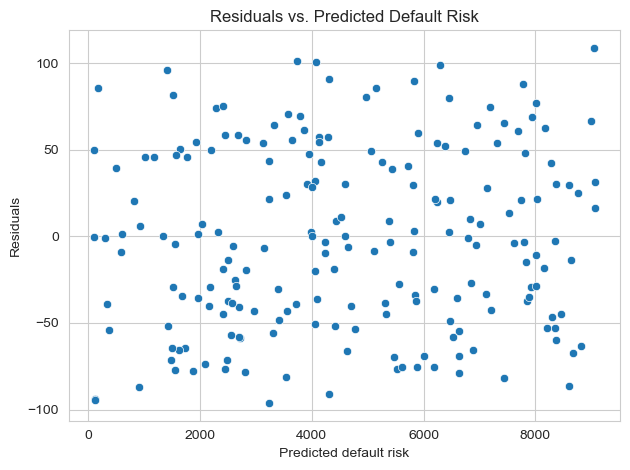

In [94]:
# Homoscedasticity
residuals = y_pred - y

sns.scatterplot(x=y_pred, y= residuals)
plt.xlabel("Predicted default risk")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Default Risk")
plt.tight_layout()

plt.show()

In [98]:
# Breusch-Pagan test
_, p_value, _, _ =sm.stats.diagnostic.het_breuschpagan(residuals, X)
p_value

0.4600246142057317

In [108]:
# Goldfeld-Quandt test
results = sm.stats.diagnostic.het_goldfeldquandt(residuals, X)
print(f"p_value: {results[1]:.4f}")

p_value: 0.1191
